<a href="https://colab.research.google.com/github/Sarthak016/Bike_Sharing_Demand_Predcition_DD/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project_update2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

#Step 1 - Download and Explore the Data


In [1]:
import pandas as pd
import numpy as np
## Display all the columns of the dataframe
pd.pandas.set_option('display.max_columns',None)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


We can now create a Pandas dataframe using the downloaded file, to view and analyze the data.

In [3]:
# Read the csv file
data=pd.read_csv("/content/drive/MyDrive/Capstone2/SeoulBikeData.csv",encoding= 'unicode_escape')

In [4]:
data

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


**The dataset contains 8760 rows and 14 columns. Each row of the dataset contains information about weather conditions**

**Our objective is to find a way to estimate the value prediction of bike count required at each hour for the stable supply of rental bikes. using the values in the other columns. If we can do so for the historical data, then we should able to estimate bike count required at each hour.**

**Let's check the data type for each column.**

In [5]:
data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [6]:
# Check for duplicated entries.
print("Duplicate entry in data:",len(data[data.duplicated()])) 

Duplicate entry in data: 0


In [7]:
# Custom Function for Dtype,Unique values and Null values
def datainfo():
    temp_ps = pd.DataFrame(index=data.columns)
    temp_ps['DataType'] = data.dtypes
    temp_ps["Non-null_Values"] = data.count()
    temp_ps['Unique_Values'] = data.nunique()
    temp_ps['NaN_Values'] = data.isnull().sum()
    temp_ps['NaN_Values_Percentage'] = (temp_ps['NaN_Values']/len(data))*100 
    return temp_ps

In [8]:
# Shape of the data.
print("Total Rows and Columns in DataFrame is :",data.shape,"\n") 
# Custom Function
datainfo()

Total Rows and Columns in DataFrame is : (8760, 14) 



,DataType,Non-null_Values,Unique_Values,NaN_Values,NaN_Values_Percentage
Date,object,8760,365,0,0.0
Rented Bike Count,int64,8760,2166,0,0.0
Hour,int64,8760,24,0,0.0
Temperature(°C),float64,8760,546,0,0.0
Humidity(%),int64,8760,90,0,0.0
Wind speed (m/s),float64,8760,65,0,0.0
Visibility (10m),int64,8760,1789,0,0.0
Dew point temperature(°C),float64,8760,556,0,0.0
Solar Radiation (MJ/m2),float64,8760,345,0,0.0
Rainfall(mm),float64,8760,61,0,0.0


Looks like "Seasons", "Holiday", "Functioning Day" are strings (possibly categories) and rest columns are numerical data. None of the columns contain any missing values, which saves us a fair bit of work!

Here are some statistics for the numerical columns:

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


The ranges of values in the numerical columns seem reasonable too, so we may not have to do much data cleaning or correction. The "Wind speed","Dew point temperature(°C)", "Solar Radiation", "Rainfall" and "Snowfall" column seems to be significantly skewed however, as the median (50 percentile) is much lower than the maximum value.

## Exploratory Analysis and Visualization

Let's explore the data by visualizing the distribution of values in some columns of the dataset, and the relationships between "Rented Bike count" and other columns.

We'll use libraries Matplotlib, Seaborn and Plotly for visualization.

In [10]:
# The following settings will improve the default style and font sizes for our charts.
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### Numerical Variables

In [11]:
# list of numerical variables
numerical_features = [feature for feature in data.columns if data[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))
# visualise the numerical variables
data[numerical_features].head()

Number of numerical variables:  10


,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0


#### Numerical variables are usually of 2 type

####Discrete Variables

Discrete Variables Count: 1


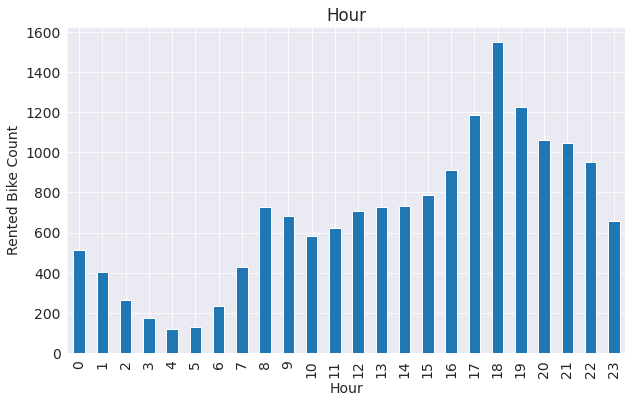

In [12]:
## Lets analyse the discrete values by creating histograms to understand the distribution
discrete_feature=[feature for feature in numerical_features if len(data[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

## Lets Find the realtionship between them and Sale PRice
for feature in discrete_feature:
    dataset=data.copy()
    dataset.groupby(feature)['Rented Bike Count'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Rented Bike Count')
    plt.title(feature)
    plt.show()

####Continuous Variables

Continuous feature Count 9


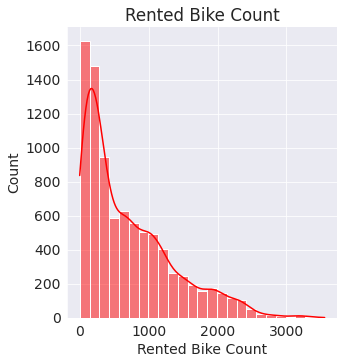

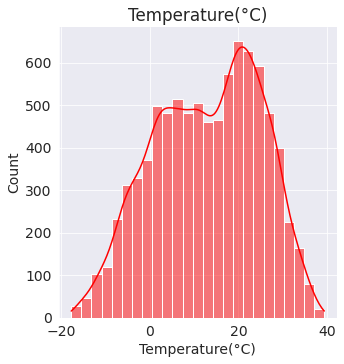

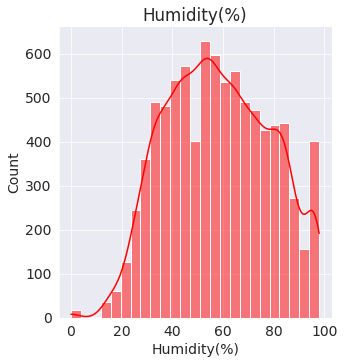

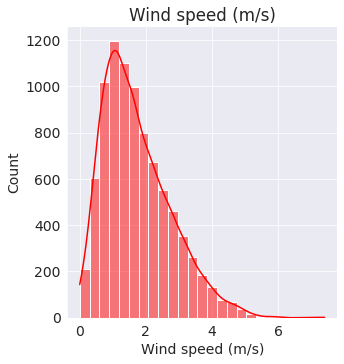

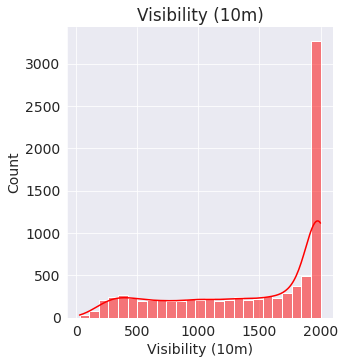

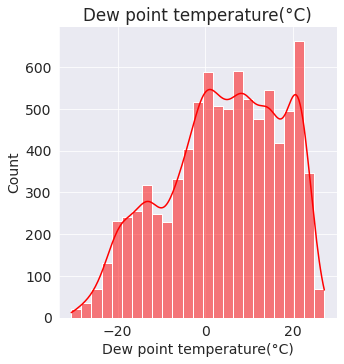

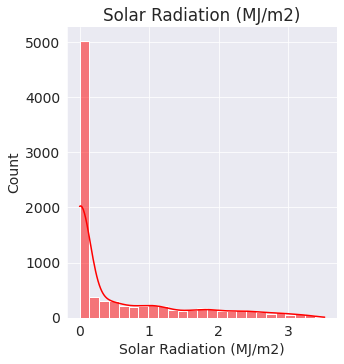

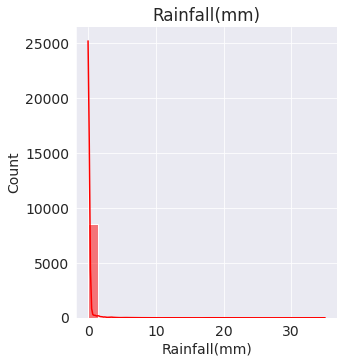

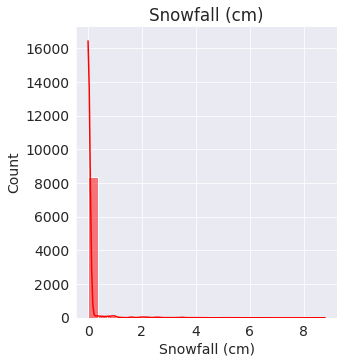

In [13]:
## Lets analyse the continuous values by creating histograms to understand the distribution
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print("Continuous feature Count {}".format(len(continuous_feature)))

for feature in continuous_feature:
    dataset=data.copy()
    sns.displot(dataset[feature],kde=True,bins=25,color="r")
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

### Categorical Variables

In [14]:
# list of categorical variables
categorical_features = [feature for feature in data.columns if data[feature].dtypes == 'O']
categorical_features = ['Seasons', 'Holiday', 'Functioning Day']
print('Number of categorical variables: ', len(categorical_features))
# visualise the categorical variables
data[categorical_features].head()

Number of categorical variables:  3


,Seasons,Holiday,Functioning Day
0,Winter,No Holiday,Yes
1,Winter,No Holiday,Yes
2,Winter,No Holiday,Yes
3,Winter,No Holiday,Yes
4,Winter,No Holiday,Yes


In [15]:
# Unique number of categorical features
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(data[feature].unique())))

The feature is Seasons and number of categories are 4
The feature is Holiday and number of categories are 2
The feature is Functioning Day and number of categories are 2


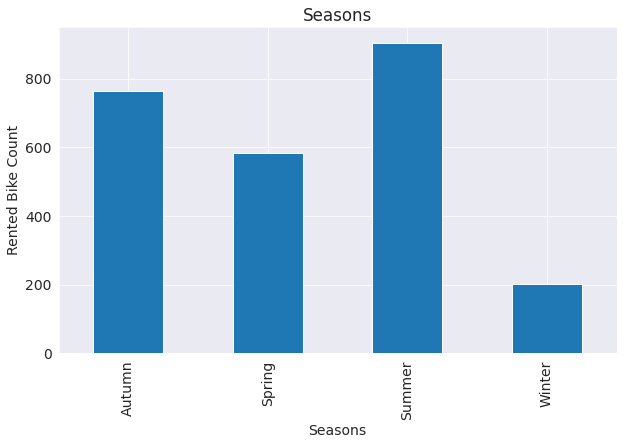

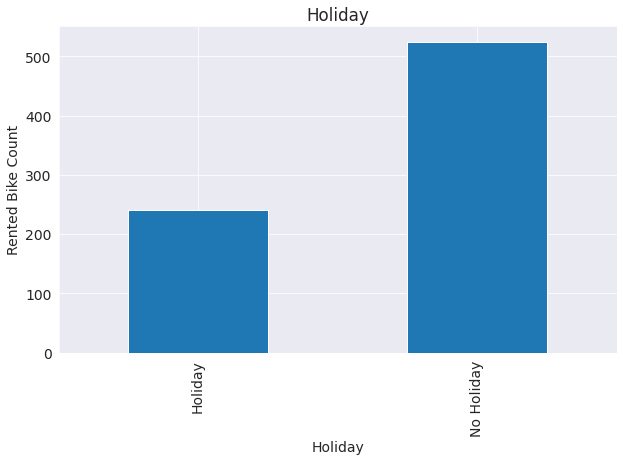

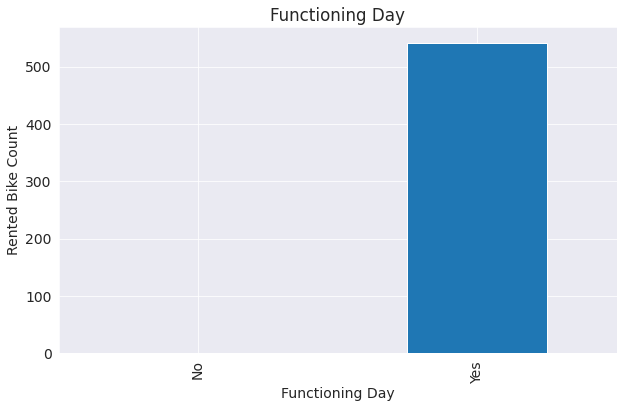

In [16]:
#Find out the relationship between categorical variable and dependent feature Rented Bike Count
for feature in categorical_features:
    dataset=data.copy()
    dataset.groupby(feature)['Rented Bike Count'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Rented Bike Count')
    plt.title(feature)
    plt.show()

# Outliers

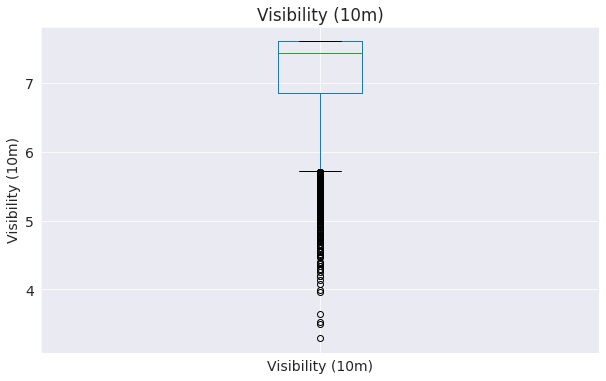

In [17]:
for feature in numerical_features:
    dataset=data.copy()
    if 0 in dataset[feature].unique():
        pass
    else:
        dataset[feature]=np.log(dataset[feature])
        dataset.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()   

# Step 2 - Prepare the Dataset for Training


Before we can train the model, we need to prepare the dataset. Here are the steps we'll follow:

1. Identify the input and target column(s) for training the model.
2. Identify numeric and categorical input columns.
3. [Impute](https://scikit-learn.org/stable/modules/impute.html) (fill) missing values in numeric columns
4. [Scale](https://scikit-learn.org/stable/modules/preprocessing.html#scaling-features-to-a-range) values in numeric columns to a $(0,1)$ range.
5. [Encode](https://scikit-learn.org/stable/modules/preprocessing.html#encoding-categorical-features) categorical data into one-hot vectors.
6. Split the dataset into training and validation sets.


Date

First, let's convert `Date` to a `datecolumn` and extract different parts of the date.

In [18]:
def split_date(df):
  df['Date'] = pd.to_datetime(df["Date"])
  df["Year"] = df.Date.dt.year
  df["Month"] = df.Date.dt.month
  df["Day"] = df.Date.dt.day
  df['Weekofyear']= df.Date.dt.isocalendar().week

split_date(data)  

## Identify Inputs and Targets

While the dataset contains `18` columns, not all of them are useful for modeling. Note the following:

- The first column is `date` and isn't useful for training the model.
- The second column `Rented Bike Count` contains the value we need to predict i.e. it's the target column.
- Data from all the other columns (except the first and the last column) can be used as inputs to the model.
 

>Create a list `input_cols` of column names containing data that can be used as input to train the model, and identify the target column as the variable `target_col`.

In [19]:
# Identify the input columns (a list of column names)
input_cols=list(data.columns)[2:]
# Identify the name of the target column 
target_cols=list(data.columns)[1]

In [20]:
# It always a good practice whatever code u execute, print and check it 
input_cols

['Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'Seasons',
 'Holiday',
 'Functioning Day',
 'Year',
 'Month',
 'Day',
 'Weekofyear']

In [21]:
# It always a good practice whatever code u execute, print and check it 
target_cols

'Rented Bike Count'

>Make sure that the `Date` and `Rented Bike Count` columns are not included in `input_cols`.

Now that we've identified the input and target columns, we can separate input & target data.

In [22]:
# Separate input & target data
inputs_df = data[input_cols] 
targets = data[target_cols]

In [23]:
# It always a good practice whatever code u execute, print and check it 
inputs_df

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Year,Month,Day,Weekofyear
0,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,2
1,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,2
2,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,2
3,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,2
4,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,30,48
8756,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,30,48
8757,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,30,48
8758,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,30,48


In [24]:
# It always a good practice whatever code u execute, print and check it 
targets

0        254
1        204
2        173
3        107
4         78
        ... 
8755    1003
8756     764
8757     694
8758     712
8759     584
Name: Rented Bike Count, Length: 8760, dtype: int64

>Create two lists `numeric_cols` and `categorical_cols` containing names of numeric and categorical input columns within the dataframe respectively. Numeric columns have data types `int64` and `float64`, whereas categorical columns have the data type `object`.
*italicized text*

In [25]:
# identifying Numerical and Categorical columns
numeric_cols = inputs_df.select_dtypes(include=np.number).columns.tolist()
categorical_cols= inputs_df.select_dtypes(include=[object]).columns.tolist()

In [26]:
# It always a good practice whatever code u execute, print and check it 
numeric_cols

['Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'Year',
 'Month',
 'Day',
 'Weekofyear']

In [27]:
# It always a good practice whatever code u execute, print and check it 
categorical_cols

['Seasons', 'Holiday', 'Functioning Day']

##Scale Numerical Values
The numeric columns in our dataset have varying ranges.

In [28]:
# using isna() to calculate the null values in Numeric columns
inputs_df[numeric_cols].describe().loc[['min','max']]

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Year,Month,Day,Weekofyear
min,0.0,-17.8,0.0,0.0,27.0,-30.6,0.00,0.0,0.0,2017.0,1.0,1.0,1.0
max,23.0,39.4,98.0,7.4,2000.0,27.2,3.52,35.0,8.8,2018.0,12.0,31.0,52.0


A good practice is to [scale numeric features](https://scikit-learn.org/stable/modules/preprocessing.html#scaling-features-to-a-range) to a small range of values e.g. $(0,1)$. Scaling numeric features ensures that no particular feature has a disproportionate impact on the model's loss. Optimization algorithms also work better in practice with smaller numbers.


>Scale numeric values to the $(0, 1)$ range using `MinMaxScaler` from `sklearn.preprocessing`.

In [29]:
from sklearn.preprocessing import MinMaxScaler
# Create the scaler
scaler=MinMaxScaler()
# Fit the scaler to the numeric columns
scaler.fit(inputs_df[numeric_cols])
# Transform and replace the numeric columns
inputs_df[numeric_cols] = scaler.transform(inputs_df[numeric_cols])

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)



After scaling, the ranges of all numeric columns should be (0, 1).

In [30]:
# using isna() to calculate the null values in Numeric columns
inputs_df[numeric_cols].describe().loc[['min','max']]

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Year,Month,Day,Weekofyear
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


##Encode Categorical Columns
Our dataset contains several categorical columns, each with a different number of categories.

In [31]:
# Printing unique Categorical columns 
inputs_df[categorical_cols].nunique().sort_values(ascending=False)

Seasons            4
Holiday            2
Functioning Day    2
dtype: int64



Since machine learning models can only be trained with numeric data, we need to convert categorical data to numbers. A common technique is to use one-hot encoding for categorical columns.

<img src="https://i.imgur.com/n8GuiOO.png" width="640">

One hot encoding involves adding a new binary (0/1) column for each unique category of a categorical column.

>Encode categorical columns in the dataset as one-hot vectors using `OneHotEncoder` from `sklearn.preprocessing`. Add a new binary (0/1) column for each category

In [32]:
from sklearn.preprocessing import OneHotEncoder

# 1. Create the encoder
encoder=OneHotEncoder(sparse=False, handle_unknown= "ignore")
# 2. Fit the encoder to thr categorical columns
encoder.fit(inputs_df[categorical_cols])
# 3. Generate column names for each category
encoded_cols= list(encoder.get_feature_names(categorical_cols))
# 4. Transform and add new one-hot category columns
inputs_df[encoded_cols] = encoder.transform(inputs_df[categorical_cols])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


The new one-hot category columns should now be added to `inputs_df`.

In [33]:
input = inputs_df[numeric_cols + encoded_cols]
target = targets

##Feature Selection

In [34]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

### Apply Feature Selection
# first, I specify the Lasso Regression model, and I
# select a suitable alpha (equivalent of penalty).
# The bigger the alpha the less features that will be selected.

# Then I use the selectFromModel object from sklearn, which
# will select the features which coefficients are non-zero

feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0)) # remember to set the seed, the random state in this function
feature_sel_model.fit(input, target)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.017e+08, tolerance: 3.644e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [35]:
feature_sel_model.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True, False])

In [36]:
# let's print the number of total and selected features
# this is how we can make a list of the selected features
selected_feat = input.columns[(feature_sel_model.get_support())]

# let's print some stats
print('total features: {}'.format((input.shape[1])))
print('selected features: {}'.format(len(selected_feat)))

total features: 21
selected features: 19


In [37]:
selected_feat


Index(['Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)',
       'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Year',
       'Month', 'Day', 'Weekofyear', 'Seasons_Autumn', 'Seasons_Spring',
       'Seasons_Summer', 'Seasons_Winter', 'Holiday_Holiday',
       'Functioning Day_No'],
      dtype='object')

In [38]:
input=input[selected_feat]
input

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Year,Month,Day,Weekofyear,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_Holiday,Functioning Day_No
0,0.000000,0.220280,0.377551,0.297297,1.000000,0.224913,0.0,0.0,0.0,0.0,0.000000,0.366667,0.019608,0.0,0.0,0.0,1.0,0.0,0.0
1,0.043478,0.215035,0.387755,0.108108,1.000000,0.224913,0.0,0.0,0.0,0.0,0.000000,0.366667,0.019608,0.0,0.0,0.0,1.0,0.0,0.0
2,0.086957,0.206294,0.397959,0.135135,1.000000,0.223183,0.0,0.0,0.0,0.0,0.000000,0.366667,0.019608,0.0,0.0,0.0,1.0,0.0,0.0
3,0.130435,0.202797,0.408163,0.121622,1.000000,0.224913,0.0,0.0,0.0,0.0,0.000000,0.366667,0.019608,0.0,0.0,0.0,1.0,0.0,0.0
4,0.173913,0.206294,0.367347,0.310811,1.000000,0.207612,0.0,0.0,0.0,0.0,0.000000,0.366667,0.019608,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,0.826087,0.384615,0.346939,0.351351,0.946275,0.351211,0.0,0.0,0.0,1.0,0.909091,0.966667,0.921569,1.0,0.0,0.0,0.0,0.0,0.0
8756,0.869565,0.370629,0.377551,0.310811,1.000000,0.358131,0.0,0.0,0.0,1.0,0.909091,0.966667,0.921569,1.0,0.0,0.0,0.0,0.0,0.0
8757,0.913043,0.356643,0.397959,0.040541,0.983781,0.358131,0.0,0.0,0.0,1.0,0.909091,0.966667,0.921569,1.0,0.0,0.0,0.0,0.0,0.0
8758,0.956522,0.347902,0.418367,0.135135,0.928535,0.359862,0.0,0.0,0.0,1.0,0.909091,0.966667,0.921569,1.0,0.0,0.0,0.0,0.0,0.0


##Training and Validation Set
Finally, let's split the dataset into a training and validation set. We'll use a randomly select 25% subset of the data for validation. Also, we'll use just the numeric and encoded columns, since the inputs to our model must be numbers.

In [39]:
# Import train_test_split from sklearn library to make split of data into train sets and validation sets
from sklearn.model_selection import train_test_split
train_inputs, val_inputs, train_targets, val_targets = train_test_split(input,target,test_size=0.25,random_state=42)

In [40]:
# It always a good practice to print and check the executed codes.
train_inputs

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Year,Month,Day,Weekofyear,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_Holiday,Functioning Day_No
2223,0.652174,0.590909,0.142857,0.297297,0.912823,0.330450,0.661932,0.000000,0.0,1.0,0.181818,0.066667,0.156863,0.0,1.0,0.0,0.0,0.0,0.0
798,0.260870,0.194056,0.489796,0.324324,0.995438,0.254325,0.000000,0.000000,0.0,1.0,0.181818,0.000000,0.156863,0.0,0.0,0.0,1.0,0.0,0.0
7752,0.000000,0.508741,0.724490,0.162162,0.998479,0.636678,0.000000,0.000000,0.0,1.0,0.818182,0.633333,0.803922,1.0,0.0,0.0,0.0,0.0,0.0
734,0.608696,0.363636,0.285714,0.513514,0.977699,0.292388,0.312500,0.000000,0.0,0.0,1.000000,1.000000,1.000000,0.0,0.0,0.0,1.0,1.0,0.0
2881,0.043478,0.512238,0.785714,0.270270,0.286873,0.660900,0.000000,0.000000,0.0,1.0,0.181818,1.000000,0.235294,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,0.956522,0.833916,0.755102,0.270270,0.595033,0.956747,0.000000,0.000000,0.0,1.0,0.545455,0.866667,0.568627,0.0,0.0,1.0,0.0,0.0,0.0
5191,0.304348,0.722028,0.918367,0.067568,0.211860,0.904844,0.014205,0.014286,0.0,1.0,0.363636,0.200000,0.352941,0.0,0.0,1.0,0.0,0.0,0.0
5390,0.608696,0.826923,0.632653,0.364865,0.970096,0.899654,0.508523,0.000000,0.0,1.0,0.545455,0.400000,0.529412,0.0,0.0,1.0,0.0,0.0,0.0
860,0.869565,0.251748,0.520408,0.148649,0.691333,0.320069,0.000000,0.000000,0.0,1.0,0.363636,0.000000,0.333333,0.0,0.0,0.0,1.0,0.0,0.0


In [41]:
# It always a good practice to print and check the executed codes.
train_targets

2223    1238
798      137
7752     891
734      262
2881     502
        ... 
5734    1507
5191     828
5390     999
860      322
7270    1501
Name: Rented Bike Count, Length: 6570, dtype: int64

In [42]:
# It always a good practice to print and check the executed codes.
val_inputs

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Year,Month,Day,Weekofyear,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_Holiday,Functioning Day_No
6056,0.347826,0.786713,0.704082,0.243243,0.999493,0.892734,0.198864,0.0,0.0,1.0,0.818182,0.233333,0.784314,0.0,0.0,1.0,0.0,0.0,0.0
5556,0.521739,0.881119,0.520408,0.283784,0.391789,0.894464,0.911932,0.0,0.0,1.0,0.545455,0.633333,0.549020,0.0,0.0,1.0,0.0,0.0,0.0
5990,0.608696,0.905594,0.510204,0.162162,0.870248,0.911765,0.477273,0.0,0.0,1.0,0.545455,0.233333,0.509804,0.0,0.0,1.0,0.0,0.0,0.0
7674,0.782609,0.606643,0.479592,0.189189,0.816016,0.624567,0.031250,0.0,0.0,1.0,0.818182,0.500000,0.803922,1.0,0.0,0.0,0.0,0.0,0.0
3319,0.304348,0.423077,0.520408,0.135135,0.694881,0.477509,0.053977,0.0,0.0,1.0,0.272727,0.566667,0.294118,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1129,0.043478,0.368881,0.653061,0.054054,0.158135,0.480969,0.000000,0.0,0.0,1.0,0.000000,0.533333,0.039216,0.0,0.0,0.0,1.0,0.0,0.0
4315,0.826087,0.701049,0.724490,0.337838,0.628991,0.818339,0.039773,0.0,0.0,1.0,0.363636,0.933333,0.411765,0.0,1.0,0.0,0.0,0.0,0.0
6008,0.347826,0.811189,0.816327,0.216216,0.345160,0.958478,0.139205,0.0,0.0,1.0,0.636364,0.233333,0.607843,0.0,0.0,1.0,0.0,0.0,0.0
3438,0.260870,0.470280,0.969388,0.364865,0.175367,0.673010,0.000000,0.2,0.0,1.0,0.272727,0.733333,0.313725,0.0,1.0,0.0,0.0,0.0,0.0


In [43]:
# It always a good practice to print and check the executed codes.
val_targets

6056    1728
5556     822
5990     658
7674    2716
3319    1083
        ... 
1129     183
4315     477
6008    1693
3438       5
208      546
Name: Rented Bike Count, Length: 2190, dtype: int64

# Models

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn import neighbors
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from xgboost import plot_importance
import lightgbm 

In [45]:
models = [
           ['LinearRegression: ',              LinearRegression()],
           ['Lasso: ',                         Lasso()],
           ['Ridge: ',                         Ridge()],
           ['KNeighborsRegressor: ',           neighbors.KNeighborsRegressor()],
           ['SVR:' ,                           SVR(kernel='rbf')],
           ['DecisionTree ',                   DecisionTreeRegressor(random_state=42)],
           ['RandomForest ',                   RandomForestRegressor(random_state=42)],
           ['ExtraTreeRegressor :',            ExtraTreesRegressor(random_state=42)],
           ['GradientBoostingRegressor: ',     GradientBoostingRegressor(random_state=42)],
           ['XGBRegressor: ',                  xgb.XGBRegressor(random_state=42)] ,
           ['Light-GBM: ',                     lightgbm.LGBMRegressor(num_leaves=41, n_estimators=200,random_state=42)],
]

In [46]:
# Run all the proposed models and update the information in a list model_data
import time
from math import sqrt
from sklearn import metrics

model_data = []
for name,model in models :

    model_data_dic = {}
    model_data_dic["Name"] = name

    start = time.time()
    end = time.time()

    model.fit(train_inputs,train_targets)
    
    model_data_dic["Train_Time"] = end - start
    # Training set
    model_data_dic["Train_R2_Score"] = metrics.r2_score(train_targets,model.predict(train_inputs))
    model_data_dic["Train_RMSE_Score"] = metrics.mean_squared_error(train_targets,model.predict(train_inputs),squared=False)
    # Validation set
    model_data_dic["Test_R2_Score"] = metrics.r2_score(val_targets,model.predict(val_inputs))
    model_data_dic["Test_RMSE_Score"] = metrics.mean_squared_error(val_targets,model.predict(val_inputs),squared=False)

    model_data.append(model_data_dic)

[12:18:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [47]:
# Convert list to dataframe
df = pd.DataFrame(model_data)
df

,Name,Train_Time,Train_R2_Score,Train_RMSE_Score,Test_R2_Score,Test_RMSE_Score
0,LinearRegression:,4.768372e-07,0.557322,430.278693,0.533324,436.994455
1,Lasso:,1.192093e-06,0.552430,432.649662,0.534336,436.520703
2,Ridge:,7.152557e-07,0.556936,430.466133,0.535098,436.163123
3,KNeighborsRegressor:,7.152557e-07,0.872742,230.700277,0.776207,302.615664
4,SVR:,1.668930e-06,0.248580,560.592308,0.246706,555.201275
5,DecisionTree,1.430511e-06,1.000000,0.000000,0.754524,316.937217
6,RandomForest,9.536743e-07,0.983868,82.139798,0.867202,233.111598
7,ExtraTreeRegressor :,4.768372e-07,1.000000,0.000000,0.881398,220.299817
8,GradientBoostingRegressor:,1.192093e-06,0.861992,240.246510,0.831532,262.558857
9,XGBRegressor:,1.907349e-06,0.859599,242.321220,0.828592,264.840500


As we can see clearly out of 11 models Lightgbm, ExtraTree and XGboost give as max R2 score and Less RMSE on test set. 

> Create a function to calculate performance metrics 

In [48]:
# Import metrics from sklearn library
from sklearn import metrics

def evaluate_train(model, train_inputs,train_targets):
    # Prediction on Train inputs
    predictions = model.predict(train_inputs)
    print('Train_Data - Model Performance')
    print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(train_targets, predictions, squared=False))
    print('R^2:', metrics.r2_score(train_targets, predictions))


def evaluate_val(model, val_inputs,val_targets):
    # Prediction on val inputs
    predictions = model.predict(val_inputs)
    print('Validation_data - Model Performance')
    print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(val_targets, predictions, squared=False))
    print('R^2:', metrics.r2_score(val_targets, predictions))   


# Model-1 ExtraTreeRegressor

>Training

In [49]:
from sklearn.ensemble import ExtraTreesRegressor
num_trees = 100
# Create the model
base_model = ExtraTreesRegressor(n_estimators=num_trees)
# Fit the model
base_model.fit(train_inputs,train_targets)

ExtraTreesRegressor()

> Evaluate

In [50]:
evaluate_train(base_model, train_inputs,train_targets)

Train_Data - Model Performance
Root Mean Squared Error (RMSE): 0.0
R^2: 1.0


In [51]:
evaluate_val(base_model, val_inputs,val_targets)

Validation_data - Model Performance
Root Mean Squared Error (RMSE): 219.92489155043438
R^2: 0.8818014620933642


## Hyperparameter Tuning

Just like decision trees, random forests also have several hyperparameters. In fact many of these hyperparameters are applied to the underlying decision trees. 

Let's study some the hyperparameters for random forests. You can learn more about them here.

>RandomSearch
* As the name suggests the RandomSearch algorithm tries random combinations of a range
of values of given parameters. The numerical parameters can be specified as a range
(unlike fixed values in GridSearch). You can control the number of iterations of random
searches that you would like to perform. It is known to find a very good combination in a
lot less time compared to GridSearch; however you have to carefully choose the range for
parameters and the number of random search iteration as it can miss the best parameter
combination with lesser iterations or smaller ranges.
Let’s try the RandomSearchCV for same combination that we tried for GridSearch
and compare the time / accuracy.

In [52]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

# Create the random grid
random_grid ={'bootstrap': [True, False],
              'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
              'max_features': ['auto', 'sqrt'],
              'min_samples_leaf': [1, 2, 4],
              'min_samples_split': [2, 5, 10],
              'n_estimators': [200, 400, 600, 800, 1000]}

RF = ExtraTreesRegressor(n_jobs=-1, random_state=42)              

# Random search of parameters, using 3 fold cross validation,
random_search = RandomizedSearchCV(estimator = RF, 
                                   param_distributions = random_grid, 
                                   n_iter = 100, cv = 3, verbose=2)
# Fit the random search model
random_search.fit(train_inputs, train_targets)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=False, max_depth=80, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   2.0s
[CV] END bootstrap=False, max_depth=80, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.8s
[CV] END bootstrap=False, max_depth=80, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.8s
[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=   5.2s
[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=   5.2s
[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=   7.2s
[CV] END bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200

RandomizedSearchCV(cv=3,
                   estimator=ExtraTreesRegressor(n_jobs=-1, random_state=42),
                   n_iter=100,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000]},
                   verbose=2)

In [53]:
#We can view the best parameters from fitting the random search
best_random_search= random_search.best_params_
best_random_search

{'n_estimators': 600,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 70,
 'bootstrap': False}

In [54]:
best_random = random_search.best_estimator_

random_accuracy = evaluate_val(best_random, val_inputs, val_targets)

Validation_data - Model Performance
Root Mean Squared Error (RMSE): 220.2541444511883
R^2: 0.8814472835102058


In [55]:
evaluate_train(best_random, train_inputs, train_targets)

Train_Data - Model Performance
Root Mean Squared Error (RMSE): 0.001192597949762159
R^2: 0.9999999999965993


In [56]:
base_model = ExtraTreesRegressor(n_jobs=-1, random_state=42)
base_model.fit(train_inputs, train_targets)
base_accuracy = evaluate_train(base_model, val_inputs, val_targets)

Train_Data - Model Performance
Root Mean Squared Error (RMSE): 220.29981712808265
R^2: 0.8813981113929136


In [57]:
print('Improvement of {:0.2f}%.'.format( 100 * (0.8809 - 0.8773) / 0.8773))

Improvement of 0.41%.


Training the Best Model with custom Hyperparameters

>  Train a random forest regressor model with the best hyperparameters to minimize the validation loss.

In [58]:
# Create the model with custom hyperparameters
model = ExtraTreesRegressor(random_state=42, n_jobs=-1,max_depth=90,
                                    max_features=0.6,n_estimators=1000,min_samples_leaf=1,min_samples_split=2)
# Fit the model
model.fit(train_inputs,train_targets)

ExtraTreesRegressor(max_depth=90, max_features=0.6, n_estimators=1000,
                    n_jobs=-1, random_state=42)

In [59]:
# Training set
evaluate_train(model, train_inputs,train_targets)

# Validation set
evaluate_val(model, val_inputs,val_targets)

Train_Data - Model Performance
Root Mean Squared Error (RMSE): 0.008197746284194219
R^2: 0.9999999998393142
Validation_data - Model Performance
Root Mean Squared Error (RMSE): 217.05715768640297
R^2: 0.8848638892918265


**Visualization**

We can visualize the decision tree _learned_ from the training data.
We can can access individual decision trees using `model.estimators_`

In [60]:
model.estimators_[0]

ExtraTreeRegressor(max_depth=90, max_features=0.6, random_state=1608637542)

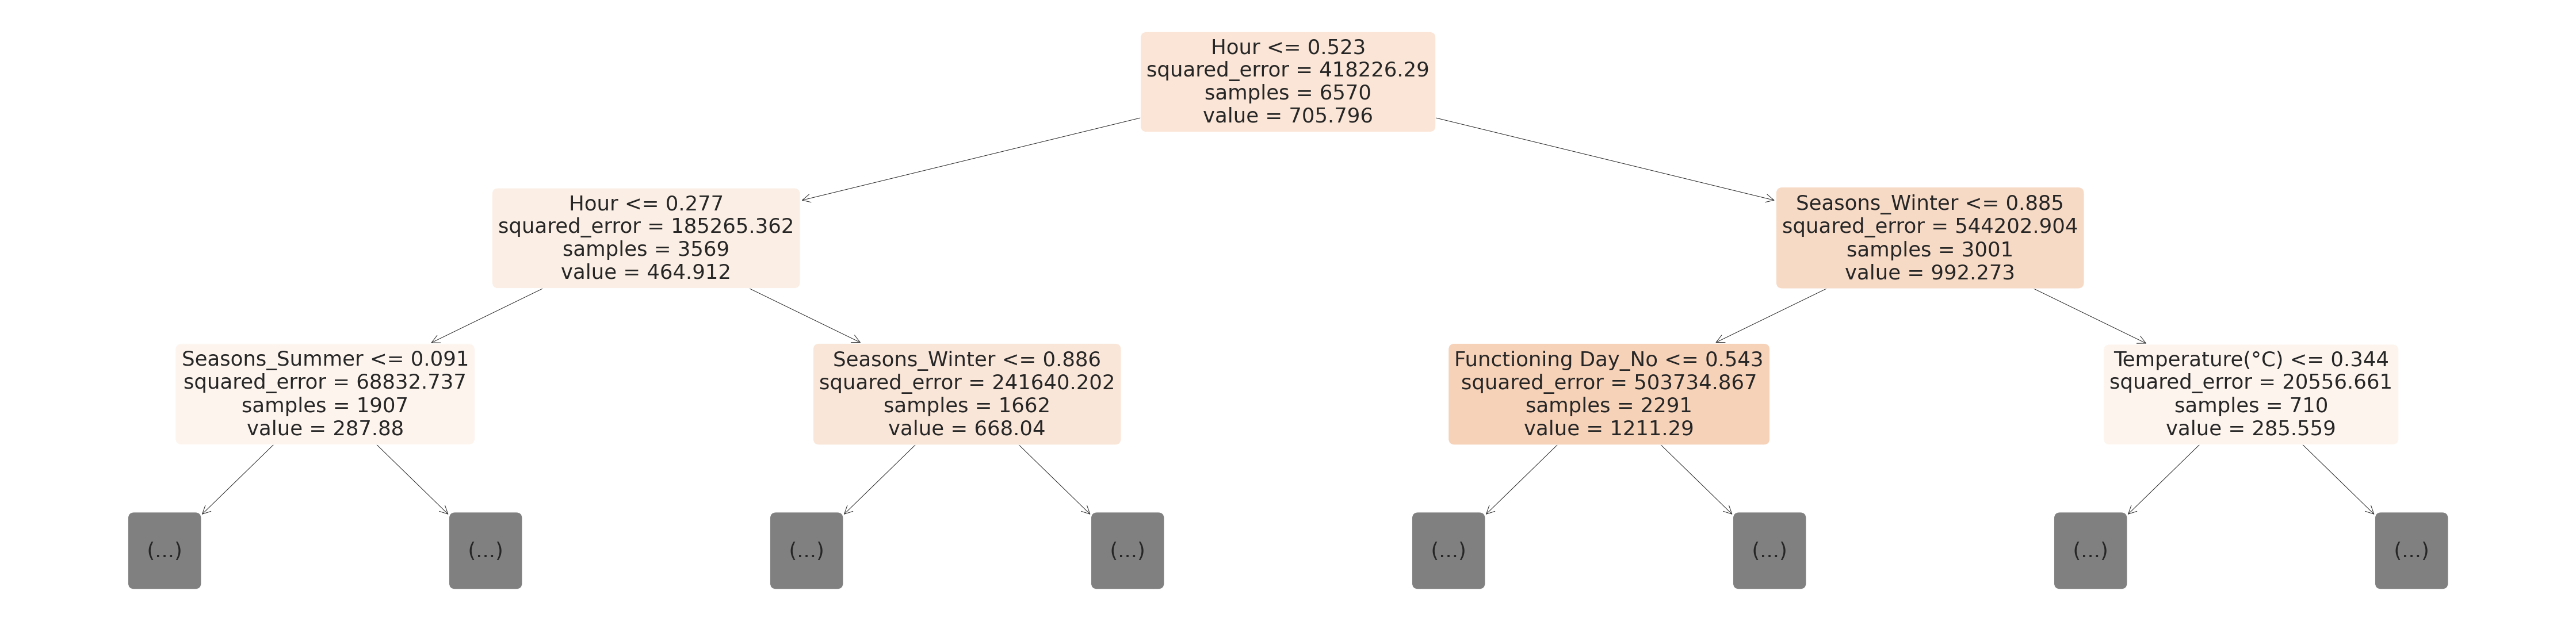

In [61]:
# Import plot_tree from sklearn library
from sklearn.tree import plot_tree

plt.figure(figsize=(80,20))
plot_tree(model.estimators_[0], max_depth=2, feature_names=train_inputs.columns, filled=True, rounded=True, );

Feature Importance
Just like decision tree, random forests also assign an "importance" to each feature, by combining the importance values from individual trees.

In [62]:
# Important features or coefficient of the model
model.feature_importances_

array([0.29405733, 0.14420513, 0.08951684, 0.0190347 , 0.03048813,
       0.04090135, 0.06565475, 0.02339199, 0.00115619, 0.00103802,
       0.01504429, 0.01806918, 0.01720079, 0.00952877, 0.00949838,
       0.01981446, 0.12390532, 0.00512673, 0.07236764])

In [63]:
importance_df = pd.DataFrame({
    'feature': train_inputs.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [ ]:
importance_df

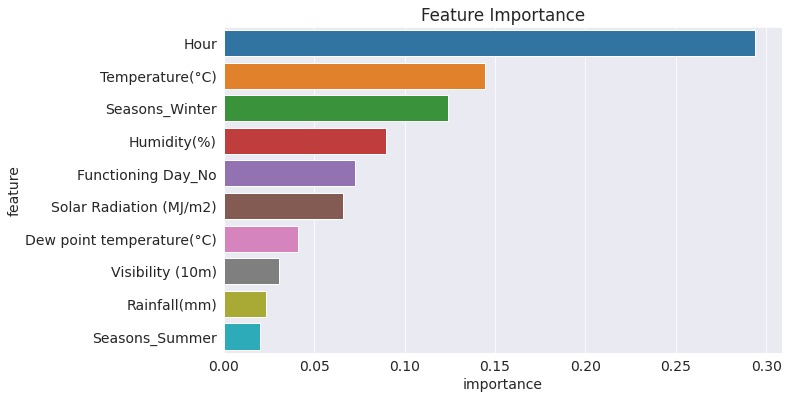

In [65]:
# Visualize the Feature Importance on bar plot
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

# Model 2 - Light GBM 
LightGBM is a gradient boosting framework that uses tree based learning algorithms. It is designed to be distributed and efficient with the following advantages:

* Faster training speed and higher efficiency.
* Lower memory usage.
* Better accuracy.
* Support of parallel, distributed, and GPU learning.
* Capable of handling large-scale data.